In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten 
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
import splitfolders
import os

In [3]:
image_loc = 'D:\Medicinal Leaf Dataset'

splitfolders.ratio(image_loc, output='output', seed=1337, ratio=(0.8,0.1,0.1))

Copying files: 1615 files [00:17, 93.43 files/s] 


In [4]:
IMAGE_SIZE = [224,224]

train_path = 'output\\train'
validation_path = 'output\\test'

In [5]:
vgg19 = VGG19(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)

80150528/80134624 [==============================] - 6s 0us/step


In [6]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [8]:
for layer in vgg19.layers:
    layer.trainable = False

In [9]:
folders = glob('D:\Medicinal Leaf Dataset\*')

In [10]:
x = Flatten()(vgg19.output)

In [11]:
prediction = Dense(len(folders), activation = 'softmax')(x)

model = Model(inputs = vgg19.input, outputs = prediction)

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [13]:
model.compile(
loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dataGen = ImageDataGenerator(rescale=1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_dataGen  = ImageDataGenerator(rescale = 1./255)

In [15]:
training_set = train_dataGen.flow_from_directory('output\\train',
                                                  target_size = (224,224),
                                                  batch_size = 32,
                                                  class_mode = 'categorical'
                                                )

Found 1360 images belonging to 26 classes.


In [16]:
val_set = train_dataGen.flow_from_directory('output\\val',
                                                  target_size = (224,224),
                                                  batch_size = 32,
                                                  class_mode = 'categorical'
                                                )

Found 333 images belonging to 26 classes.


In [18]:
r = model.fit_generator(
training_set,
validation_data = val_set,epochs = 50,
steps_per_epoch = len(training_set),
validation_steps = len(val_set)
)

<ipython-input-18-5c48062396c1>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
43/43 [==============================] - 505s 12s/step - loss: 1.9894 - accuracy: 0.5191 - val_loss: 0.6851 - val_accuracy: 0.7928
Epoch 2/50
43/43 [==============================] - 484s 11s/step - loss: 0.4857 - accuracy: 0.8522 - val_loss: 0.4321 - val_accuracy: 0.8709
Epoch 3/50
43/43 [==============================] - 480s 11s/step - loss: 0.2810 - accuracy: 0.9176 - val_loss: 0.2901 - val_accuracy: 0.9099
Epoch 4/50
43/43 [==============================] - 478s 11s/step - loss: 0.2036 - accuracy: 0.9375 - val_loss: 0.2304 - val_accuracy: 0.9339
Epoch 5/50
43/43 [==============================] - 486s 11s/step - loss: 0.1146 - accuracy: 0.9684 - val_loss: 0.1991 - val_accuracy: 0.9399
Epoch 6/50
43/43 [==============================] - 483s 11s/step - loss: 0.1001 - accuracy: 0.9743 - val_loss: 0.1309 - val_accuracy: 0.9640
Epoch 7/50
43/43 [==============================] - 481s 11s/step - loss: 0.1102 - accuracy: 0.9757 - val_loss: 0.1716 - val_accuracy: 0.9369
Epoch 

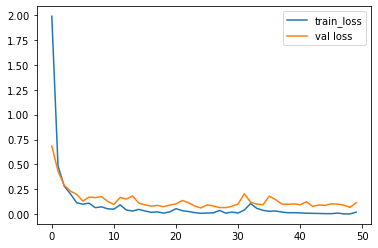

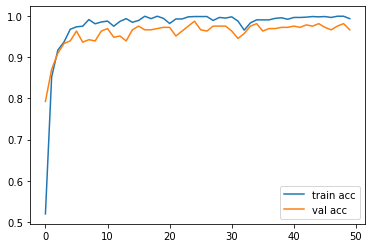

<Figure size 432x288 with 0 Axes>

In [19]:
plt.plot(r.history['loss'], label = 'train_loss')
plt.plot(r.history['val_loss'], label = 'val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(r.history['accuracy'], label = 'train acc')
plt.plot(r.history['val_accuracy'], label = 'val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:
from tensorflow.keras.models import load_model

model.save('Leaves2.vgg19.h5')

In [21]:
from tensorflow.keras.preprocessing import image

In [22]:
t_set = test_dataGen.flow_from_directory('output\\test',
                                                  target_size = (224,224),
                                                  batch_size = 32,
                                                  class_mode = 'categorical'
                                                )


Found 181 images belonging to 26 classes.


In [23]:
y_pred = model.predict(t_set)

In [24]:
y_pred

array([[1.1601904e-21, 1.3083717e-06, 1.7642915e-09, ..., 5.6606577e-16,
        7.0629918e-05, 2.9368608e-09],
       [5.0191732e-19, 2.9041018e-06, 1.3953369e-13, ..., 4.3543941e-14,
        1.0009031e-09, 1.9621406e-10],
       [3.5568398e-20, 4.2325787e-12, 1.1305445e-08, ..., 7.7139316e-11,
        4.0358555e-14, 4.5885659e-14],
       ...,
       [4.7924234e-19, 9.7601143e-05, 1.0489755e-04, ..., 2.4422588e-05,
        5.0015233e-02, 8.2461554e-01],
       [1.2365401e-24, 9.5930903e-15, 1.6652897e-20, ..., 7.9732688e-16,
        1.8623271e-09, 7.8486068e-16],
       [3.0476203e-21, 5.9616327e-06, 3.9451957e-12, ..., 8.4605135e-11,
        7.8625391e-09, 3.3642243e-07]], dtype=float32)

In [25]:
import numpy as np
y_pred = np.argmax(y_pred, axis = 1)

In [26]:
y_pred

array([22, 21,  6,  3,  4, 15, 16,  0, 24,  4,  4,  2, 11, 17, 13, 15, 11,
       15,  2, 24, 14, 17,  2,  5, 12, 18, 22, 23,  8, 13,  8, 16, 23, 16,
        6, 13,  4,  4, 20, 23, 24, 10,  5, 16, 13,  9,  7,  9, 22, 15,  1,
        7, 13,  8, 23,  4, 14,  4, 24,  7,  1, 12,  1, 14, 12,  1, 21, 19,
       17, 11, 20, 21, 11, 20,  4,  7, 13, 12,  6,  9, 18, 19, 24,  1, 10,
       17, 14, 24,  2,  0, 23, 19,  3, 14, 17,  6, 19, 14,  2, 13, 21, 15,
       24,  7, 14, 17,  8, 16, 24,  6, 14, 11, 17,  3,  4,  1,  4, 13, 20,
       22, 14,  9,  1, 22, 20, 18,  6,  4,  1, 13, 11,  0, 19, 11, 22, 10,
        7, 16, 15,  1,  5,  0, 12, 22, 24, 12,  1, 24, 24, 11, 25,  9, 18,
       21, 21, 16,  2, 20, 13,  1, 11, 10, 16,  6, 24, 23,  9,  1,  3,  0,
        5, 23, 15, 10,  6,  7,  9,  2, 25, 13, 19], dtype=int64)

In [27]:
from keras.models import load_model
model = load_model('Leaves2.vgg19.h5')

In [28]:
files = glob('output\\train\\*')

In [29]:
files = list(map(lambda x: x.replace('output\\train\\',''),files))
files

['Alpinia Galanga (Rasna)',
 'Amaranthus Viridis (Arive-Dantu)',
 'Artocarpus Heterophyllus (Jackfruit)',
 'Azadirachta Indica (Neem)',
 'Basella Alba (Basale)',
 'Brassica Juncea (Indian Mustard)',
 'Carissa Carandas (Karanda)',
 'Citrus Limon (Lemon)',
 'Ficus Auriculata (Roxburgh fig)',
 'Ficus Religiosa (Peepal Tree)',
 'Hibiscus Rosa-sinensis',
 'Jasminum (Jasmine)',
 'Mangifera Indica (Mango)',
 'Mentha (Mint)',
 'Moringa Oleifera (Drumstick)',
 'Muntingia Calabura (Jamaica Cherry-Gasagase)',
 'Murraya Koenigii (Curry)',
 'Nerium Oleander (Oleander)',
 'Nyctanthes Arbor-tristis (Parijata)',
 'Ocimum Tenuiflorum (Tulsi)',
 'Piper Betle (Betel)',
 'Plectranthus Amboinicus (Mexican Mint)',
 'Pongamia Pinnata (Indian Beech)',
 'Psidium Guajava (Guava)',
 'Punica Granatum (Pomegranate)',
 'Santalum Album (Sandalwood)']

In [30]:
name_id_map = { i : files[i] for i in range(0, len(files) ) }
name_id_map

{0: 'Alpinia Galanga (Rasna)',
 1: 'Amaranthus Viridis (Arive-Dantu)',
 2: 'Artocarpus Heterophyllus (Jackfruit)',
 3: 'Azadirachta Indica (Neem)',
 4: 'Basella Alba (Basale)',
 5: 'Brassica Juncea (Indian Mustard)',
 6: 'Carissa Carandas (Karanda)',
 7: 'Citrus Limon (Lemon)',
 8: 'Ficus Auriculata (Roxburgh fig)',
 9: 'Ficus Religiosa (Peepal Tree)',
 10: 'Hibiscus Rosa-sinensis',
 11: 'Jasminum (Jasmine)',
 12: 'Mangifera Indica (Mango)',
 13: 'Mentha (Mint)',
 14: 'Moringa Oleifera (Drumstick)',
 15: 'Muntingia Calabura (Jamaica Cherry-Gasagase)',
 16: 'Murraya Koenigii (Curry)',
 17: 'Nerium Oleander (Oleander)',
 18: 'Nyctanthes Arbor-tristis (Parijata)',
 19: 'Ocimum Tenuiflorum (Tulsi)',
 20: 'Piper Betle (Betel)',
 21: 'Plectranthus Amboinicus (Mexican Mint)',
 22: 'Pongamia Pinnata (Indian Beech)',
 23: 'Psidium Guajava (Guava)',
 24: 'Punica Granatum (Pomegranate)',
 25: 'Santalum Album (Sandalwood)'}

In [31]:
y_pred

array([22, 21,  6,  3,  4, 15, 16,  0, 24,  4,  4,  2, 11, 17, 13, 15, 11,
       15,  2, 24, 14, 17,  2,  5, 12, 18, 22, 23,  8, 13,  8, 16, 23, 16,
        6, 13,  4,  4, 20, 23, 24, 10,  5, 16, 13,  9,  7,  9, 22, 15,  1,
        7, 13,  8, 23,  4, 14,  4, 24,  7,  1, 12,  1, 14, 12,  1, 21, 19,
       17, 11, 20, 21, 11, 20,  4,  7, 13, 12,  6,  9, 18, 19, 24,  1, 10,
       17, 14, 24,  2,  0, 23, 19,  3, 14, 17,  6, 19, 14,  2, 13, 21, 15,
       24,  7, 14, 17,  8, 16, 24,  6, 14, 11, 17,  3,  4,  1,  4, 13, 20,
       22, 14,  9,  1, 22, 20, 18,  6,  4,  1, 13, 11,  0, 19, 11, 22, 10,
        7, 16, 15,  1,  5,  0, 12, 22, 24, 12,  1, 24, 24, 11, 25,  9, 18,
       21, 21, 16,  2, 20, 13,  1, 11, 10, 16,  6, 24, 23,  9,  1,  3,  0,
        5, 23, 15, 10,  6,  7,  9,  2, 25, 13, 19], dtype=int64)

In [32]:
predicted_classes = list(map(name_id_map.get, y_pred))

In [33]:
predicted_classes

['Pongamia Pinnata (Indian Beech)',
 'Plectranthus Amboinicus (Mexican Mint)',
 'Carissa Carandas (Karanda)',
 'Azadirachta Indica (Neem)',
 'Basella Alba (Basale)',
 'Muntingia Calabura (Jamaica Cherry-Gasagase)',
 'Murraya Koenigii (Curry)',
 'Alpinia Galanga (Rasna)',
 'Punica Granatum (Pomegranate)',
 'Basella Alba (Basale)',
 'Basella Alba (Basale)',
 'Artocarpus Heterophyllus (Jackfruit)',
 'Jasminum (Jasmine)',
 'Nerium Oleander (Oleander)',
 'Mentha (Mint)',
 'Muntingia Calabura (Jamaica Cherry-Gasagase)',
 'Jasminum (Jasmine)',
 'Muntingia Calabura (Jamaica Cherry-Gasagase)',
 'Artocarpus Heterophyllus (Jackfruit)',
 'Punica Granatum (Pomegranate)',
 'Moringa Oleifera (Drumstick)',
 'Nerium Oleander (Oleander)',
 'Artocarpus Heterophyllus (Jackfruit)',
 'Brassica Juncea (Indian Mustard)',
 'Mangifera Indica (Mango)',
 'Nyctanthes Arbor-tristis (Parijata)',
 'Pongamia Pinnata (Indian Beech)',
 'Psidium Guajava (Guava)',
 'Ficus Auriculata (Roxburgh fig)',
 'Mentha (Mint)',
 'Fi

In [34]:
loss, accuracy = model.evaluate(t_set, verbose=2)


6/6 - 38s - loss: 0.1744 - accuracy: 0.9558 - 38s/epoch - 6s/step


In [35]:
print(f"accuracy on test data is : {round(accuracy*100)} %")

accuracy on test data is : 96 %
